In [1]:
import pyuvdata
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
with open('/lustre/rbyrne/equalization_coeffs_20250505.pkl', 'rb') as f:
    dictionary = pickle.load(f)

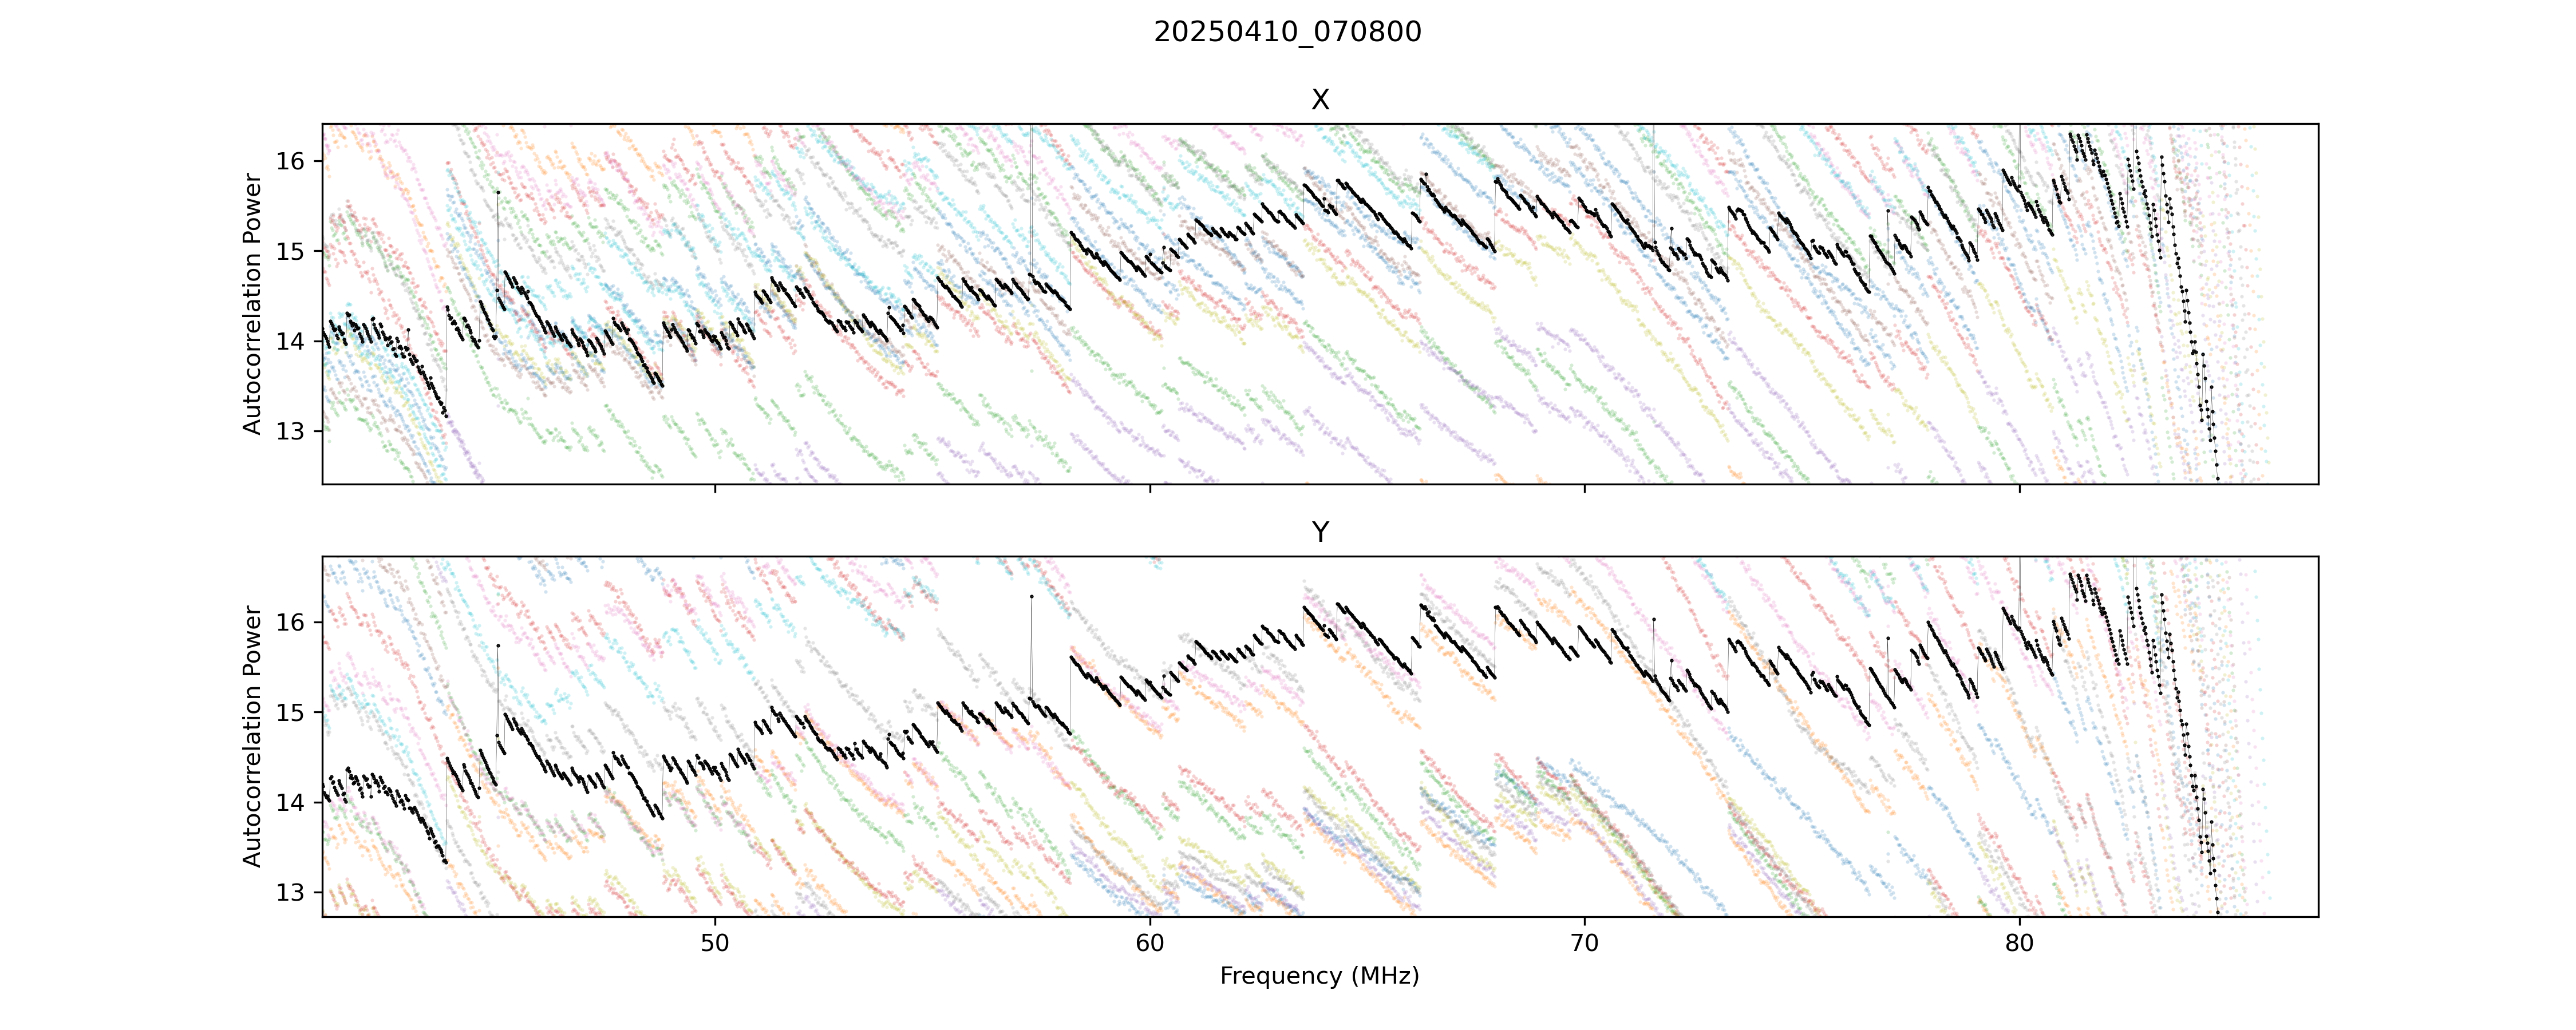

In [3]:
Image("/lustre/rbyrne/autocorrelation_plots/20250410_070800.png")

In [4]:
use_freq_bands = [
        "41",
        "46",
        "50",
        "55",
        "59",
        "64",
        "69",
        "73",
        "78",
        "82",
    ]

use_files = [f"/lustre/pipeline/cosmology/{freq}MHz/2025-04-10/07/20250410_070800_{freq}MHz_2pol.ms" for freq in use_freq_bands]
for file_ind, filename in enumerate(use_files):
    uvnew = pyuvdata.UVData()
    uvnew.read_ms(filename)
    uvnew.select(ant_str="autos")
    if file_ind == 0:
        uv = uvnew
    else:
        uv.fast_concat(uvnew, "freq", inplace=True, run_check=False)
uv.data_array[np.where(uv.data_array == 0)] = np.nan

Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.3493639816525 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.349362727161 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.799874361046 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes f

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


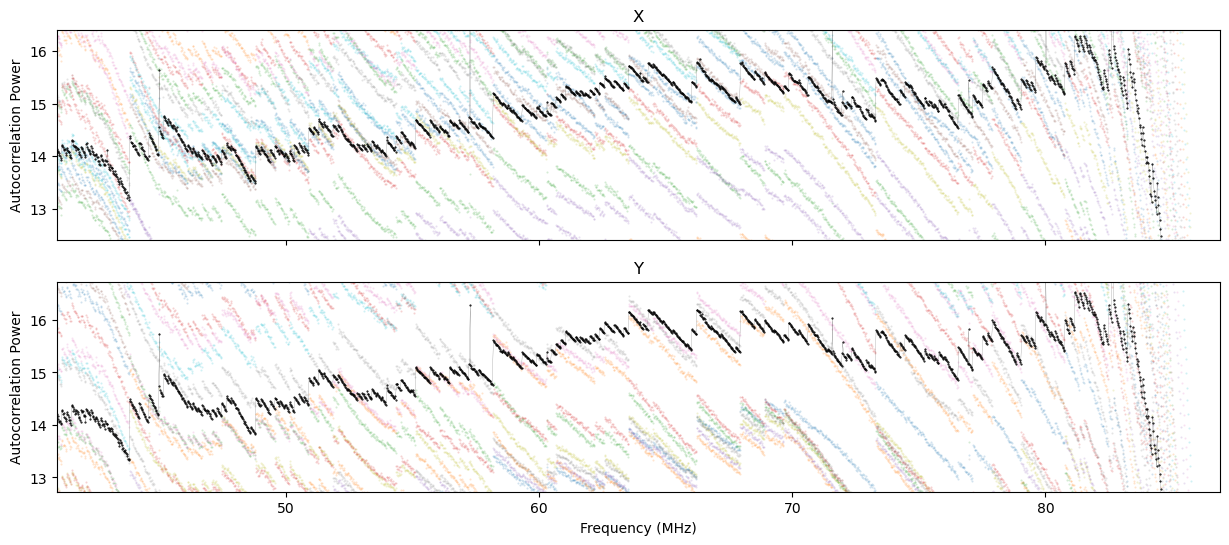

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
    ax[pol].set_ylim(np.nanmean(uv.data_array[:, :, pol]) - 2, np.nanmean(uv.data_array[:,:,pol]) + 2)
    for ant in range(20):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.2)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()


In [6]:
dictionary.keys()

dict_keys(['coeffs_set', 'coeffs_set_inds', 'antnames', 'bps', 'snaps', 'adcs'])

In [7]:
(dictionary["antnames"][0])

'LWA-266A'

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

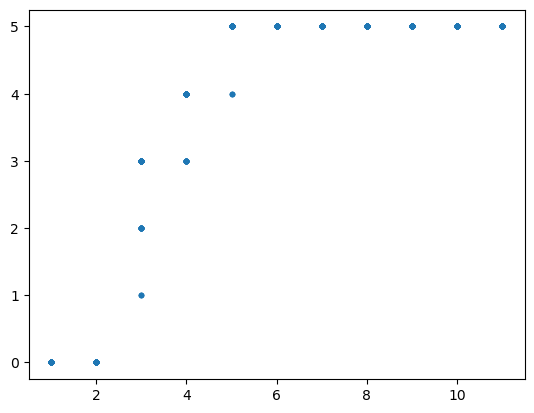

In [8]:
print(dictionary["snaps"])
print(dictionary["coeffs_set_inds"])
plt.plot(dictionary["snaps"], dictionary["coeffs_set_inds"], ".")
plt.show()

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


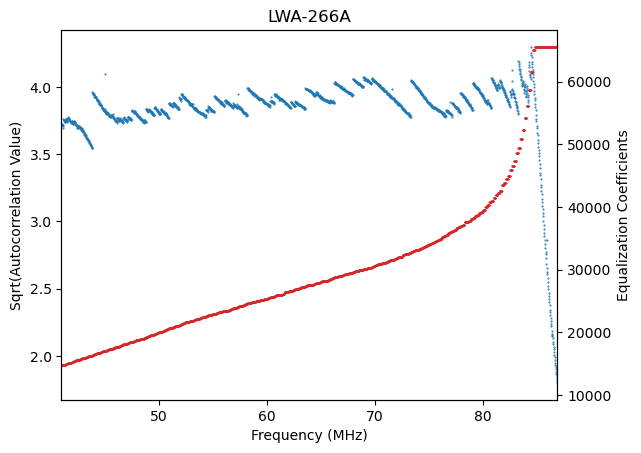

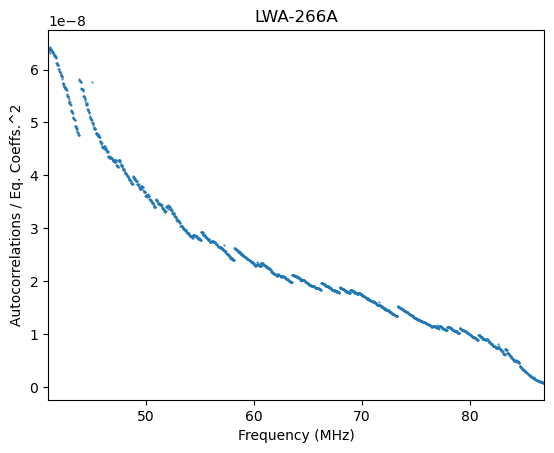

In [9]:
for ant_ind, ant in enumerate(dictionary["antnames"][0:1]):
    eq_coeffs = dictionary["coeffs_set"][dictionary["coeffs_set_inds"][ant_ind]]
    eq_coeffs = np.repeat(eq_coeffs, 8)  # One coefficient per 8 channels
    eq_freqs = np.arange(len(eq_coeffs)) * np.mean(uv.channel_width)

    # Truncate equalization coefficents to include only those saved in the data
    eq_coeffs = eq_coeffs[560:-464]
    eq_freqs = eq_freqs[560:-464]

    use_antname = f"{ant[0:3]}{ant[4:7]}"
    if ant[-1] == "A":
        use_pol = -5
    elif ant[-1] == "B":
        use_pol = -6
    autocorrs_single_ant = uv.select(antenna_names=use_antname, polarizations=use_pol, inplace=False)


    fig, ax1 = plt.subplots()
    ax1.set_title(ant)
    ax1.set_xlabel("Frequency (MHz)")
    ax1.plot(autocorrs_single_ant.freq_array/1e6, np.sqrt(autocorrs_single_ant.data_array[0, :, 0]), ".", markersize=1)
    ax1.set_ylabel("Sqrt(Autocorrelation Value)")
    #ax1.set_ylim([3.5,4.5])
    ax1.set_xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    #ax1.set_xlim([50, 51])

    ax2=ax1.twinx()
    ax2.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
    ax2.set_ylabel("Equalization Coefficients")
    #ax2.set_ylim([17500,22500])
    plt.show()
    plt.close()

    lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array))[0][0]
    highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array))[0][0]
    eq_coeffs = eq_coeffs[lowest_eq_ind:highest_eq_ind+1]
    eq_freqs = eq_freqs[lowest_eq_ind:highest_eq_ind+1]

    autos_normalized = autocorrs_single_ant.data_array[0, :, 0] / (eq_coeffs)**2.0
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1)
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

In [10]:
np.max(dictionary["bps"])

2

In [11]:
lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array[0]))[0][0]
highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array[0]))[0][0]

In [12]:
print(lowest_eq_ind)
print(highest_eq_ind)

0
0


In [13]:
eq_coeffs_mat = scipy.io.loadmat("/home/pipeline/opsdata/20241213-settingsAll-night.mat")
print(eq_coeffs_mat.keys())
print(eq_coeffs_mat["eq4"])  # Which antennas use that set of equalization coefficients
print(eq_coeffs_mat["antNames"])  # Antenna ordering

dict_keys(['__header__', '__version__', '__globals__', 'adrs', 'antNames', 'coef', 'comment', 'delay_dsig', 'eq0', 'eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'exclude', 'fftShift', 'settings', 'sigtab', 'time'])
[[132 133 136 137 138 139 140 141 142 143 144 145 146 147 150 151 152 153
  154 155 156 157 158 159 320 321 326 327 332 333 334 335 336 337 338 339
  344 345 346 347 350 351 362 363 364 365 368 369 370 371 372 373 512 513
  514 515 516 517 528 529 530 531 532 533 534 535 542 543 548 549 550 551
  552 553 554 555 556 557 558 559 560 561 566 567 590 591 604 605 606 607
  608 609 610 611 614 615]]
['LWA-266A' 'LWA-266B' 'LWA-259A' 'LWA-259B' 'LWA-268A' 'LWA-268B'
 'LWA-267A' 'LWA-267B' 'LWA-271A' 'LWA-271B' 'LWA-269A' 'LWA-269B'
 'LWA-276A' 'LWA-276B' 'LWA-273A' 'LWA-273B' 'LWA-278A' 'LWA-278B'
 'LWA-277A' 'LWA-277B' 'LWA-282A' 'LWA-282B' 'LWA-281A' 'LWA-281B'
 'LWA-307A' 'LWA-307B' 'LWA-285A' 'LWA-285B' 'LWA-309A' 'LWA-309B'
 'LWA-308A' 'LWA-308B' 'LWA-311A' 'LWA-311B' 'LWA-310A' 

In [14]:
eq_coeffs_2 = eq_coeffs_mat["coef"]

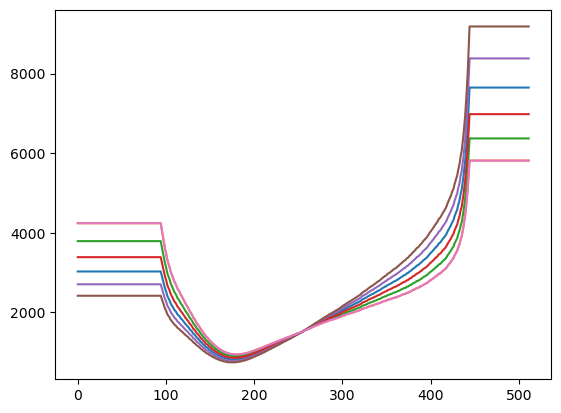

In [15]:
for ind in range(7):
    plt.plot(eq_coeffs_2[ind,:])

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


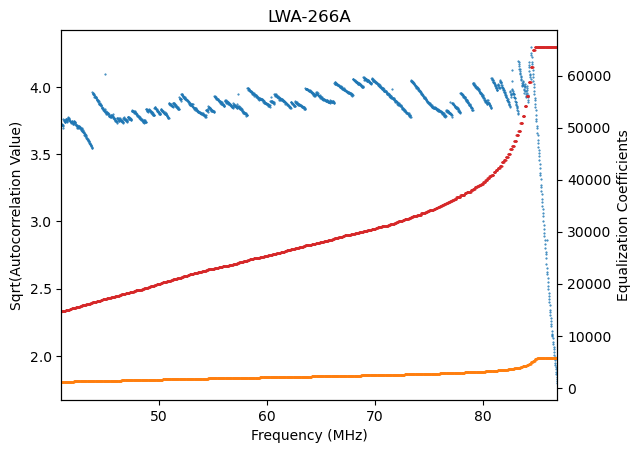

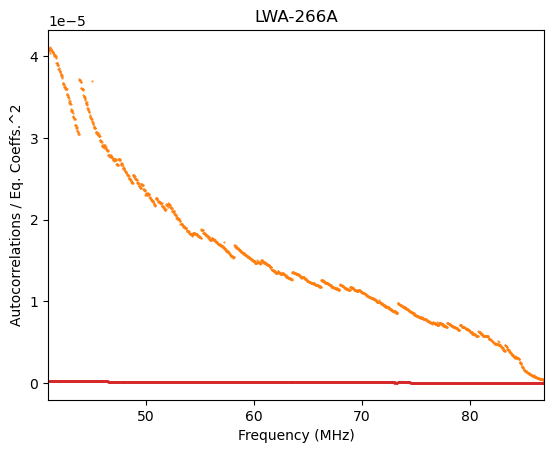

(0.006254537032254495+0j)


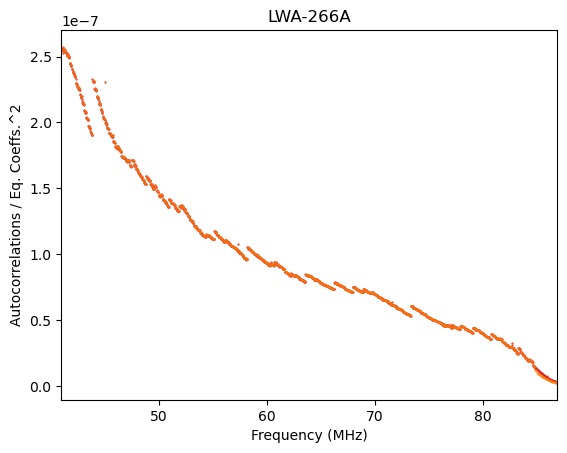

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


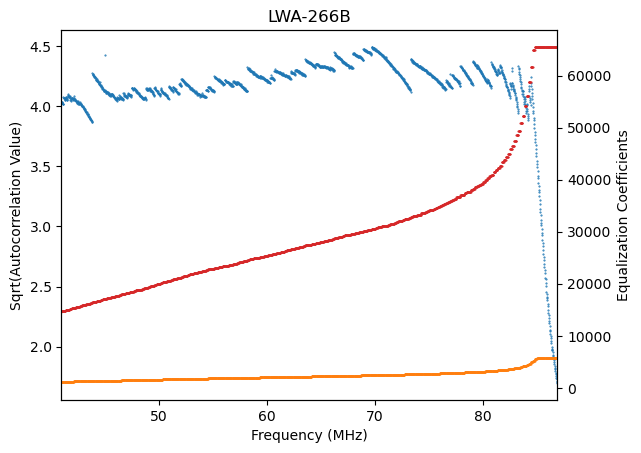

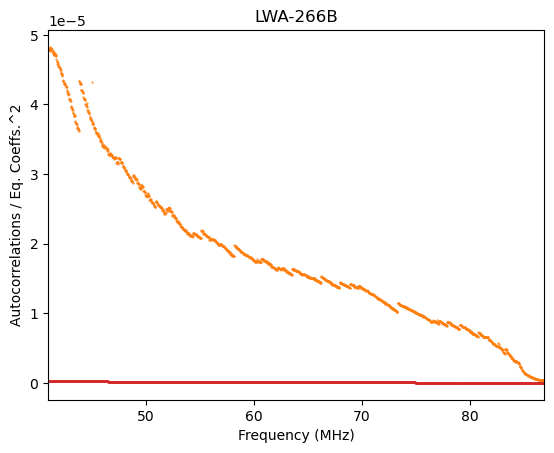

(0.006253407307018822+0j)


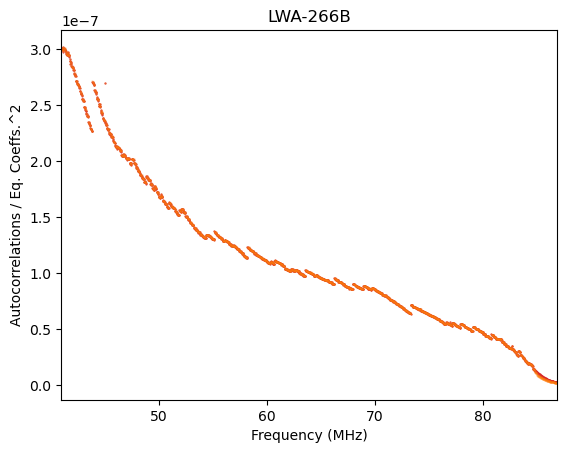

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


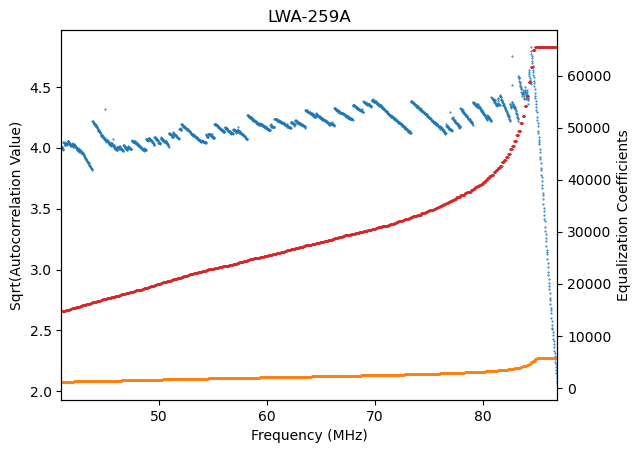

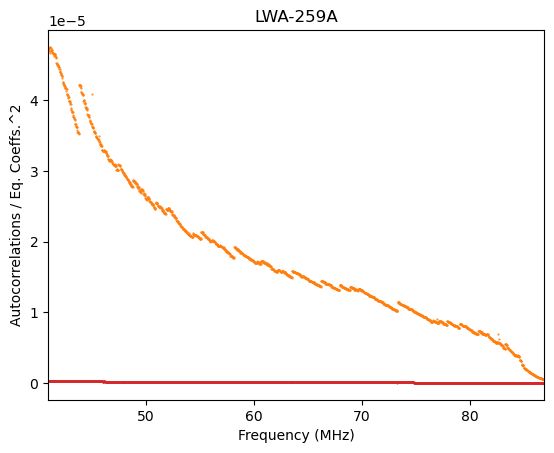

(0.006255320061478936+0j)


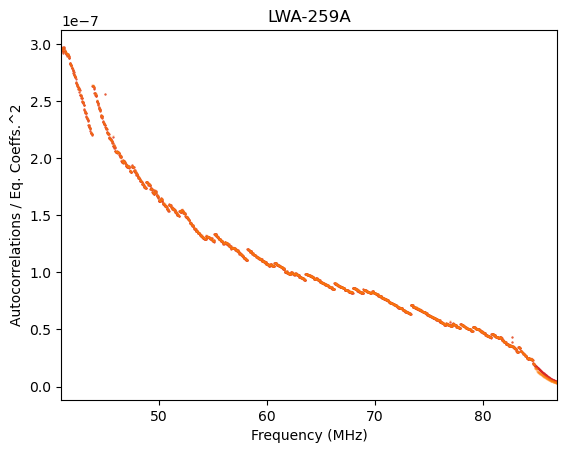

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


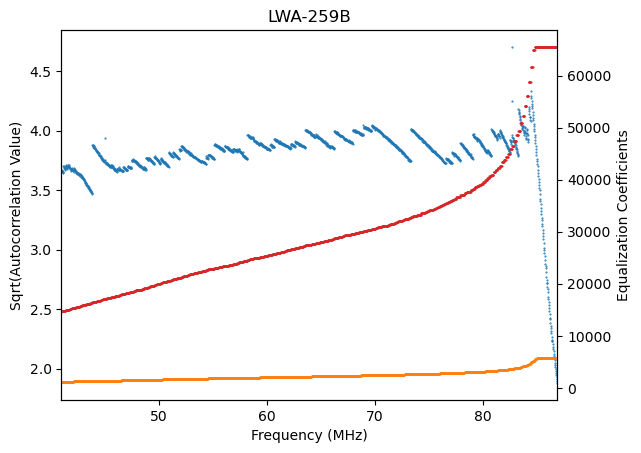

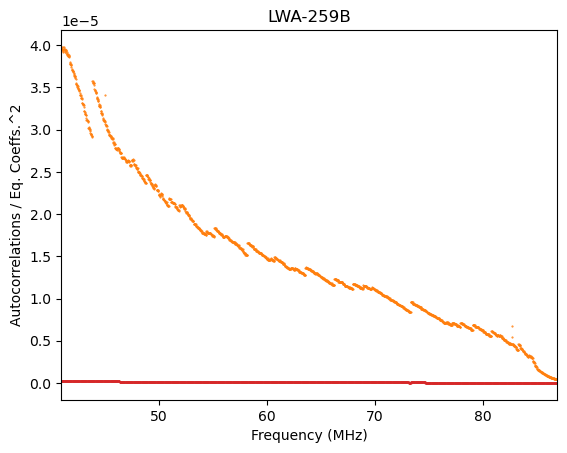

(0.006254872823806829+0j)


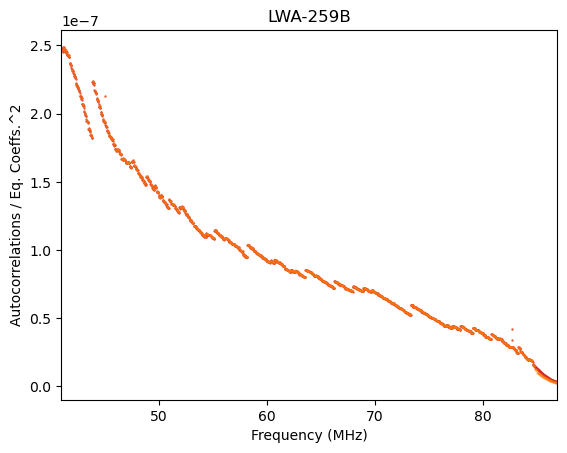

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


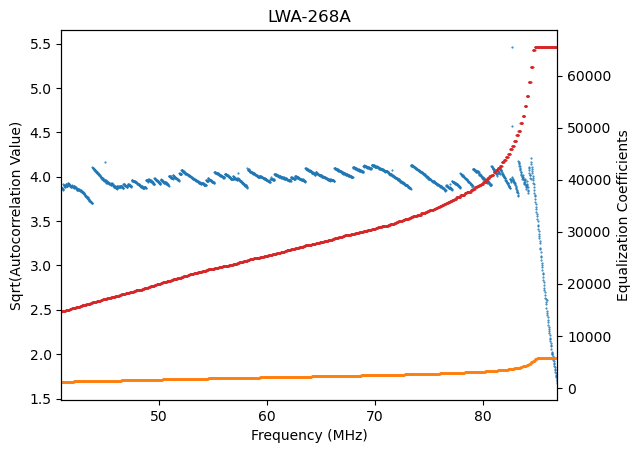

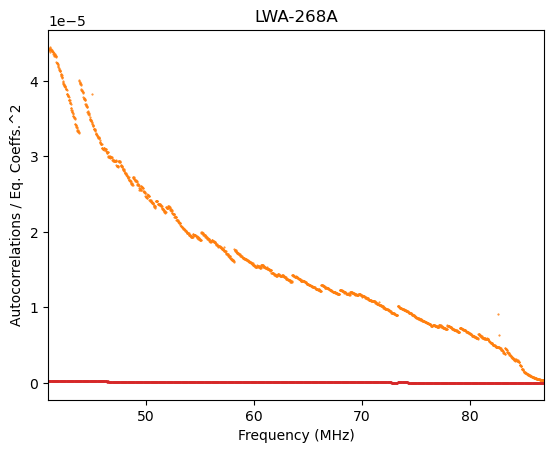

(0.006253873054422995+0j)


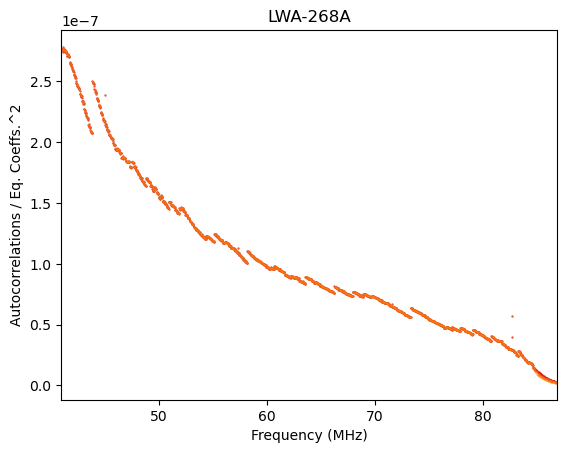

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


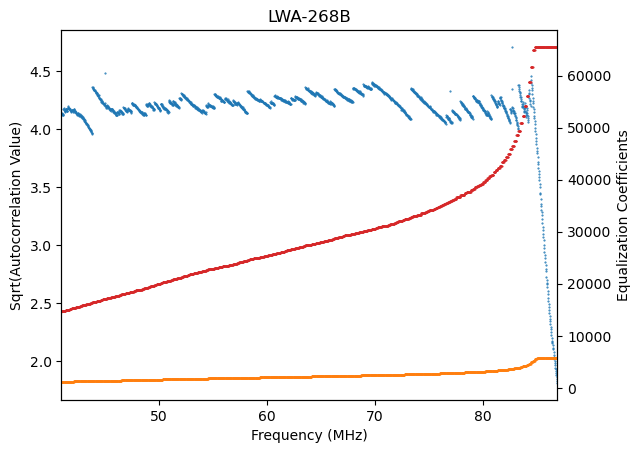

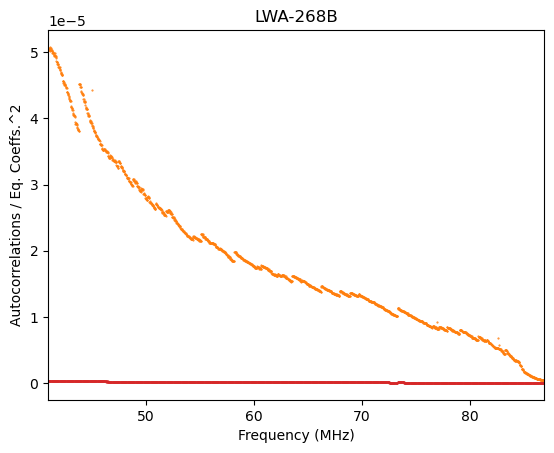

(0.006253976454915165+0j)


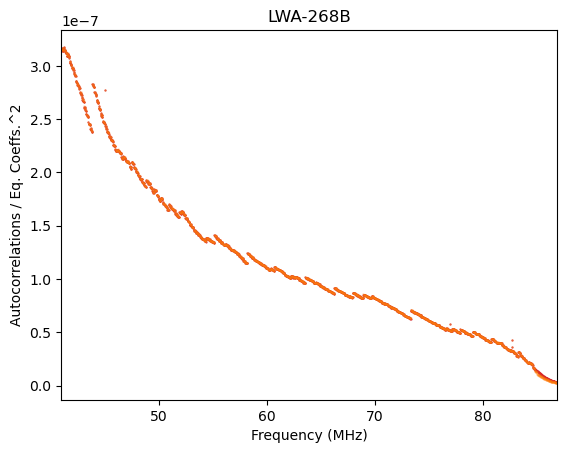

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


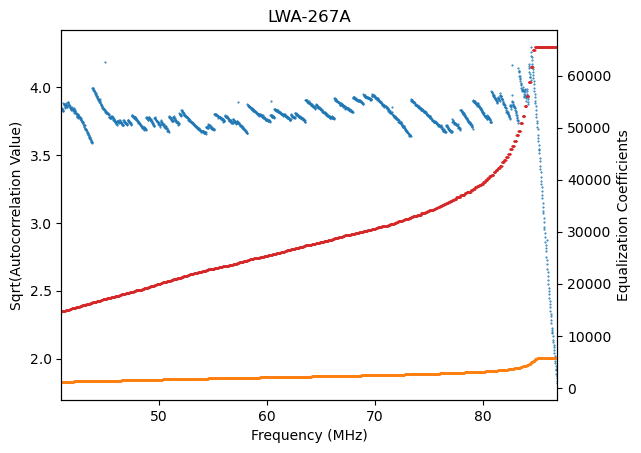

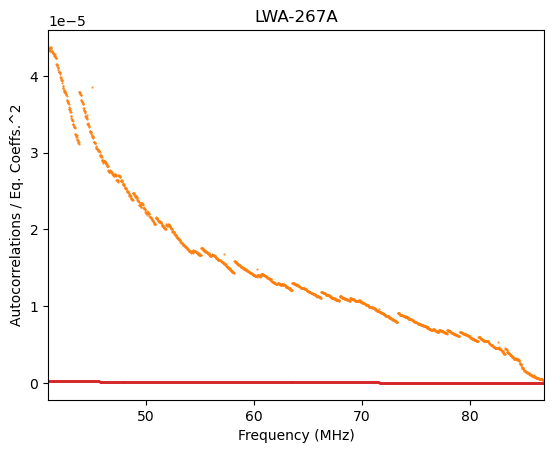

(0.006254809711630286+0j)


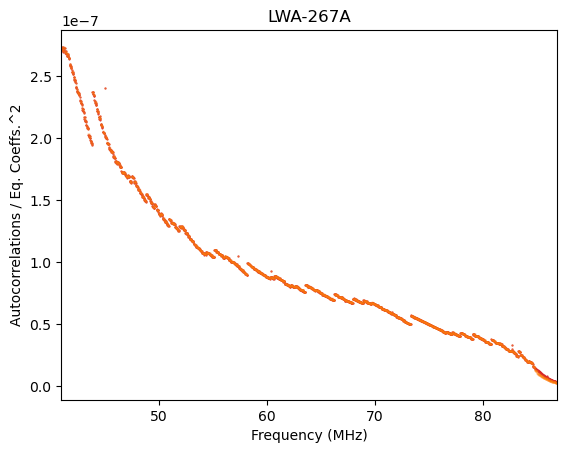

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


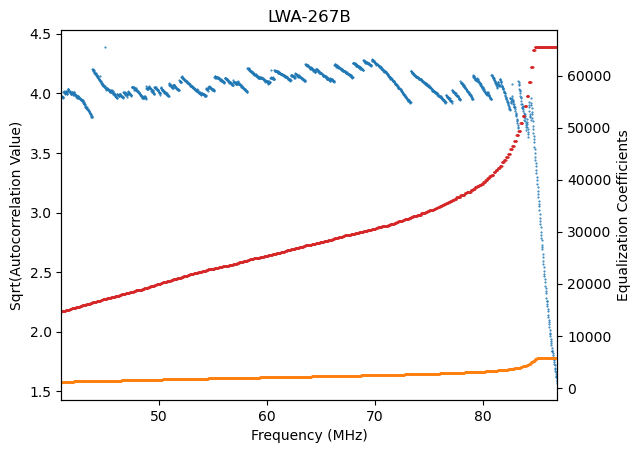

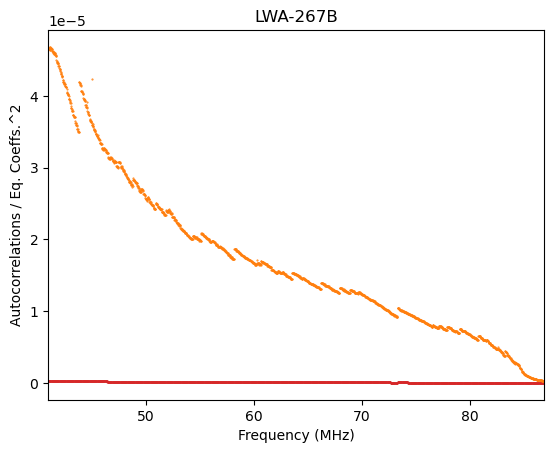

(0.006253137027174093+0j)


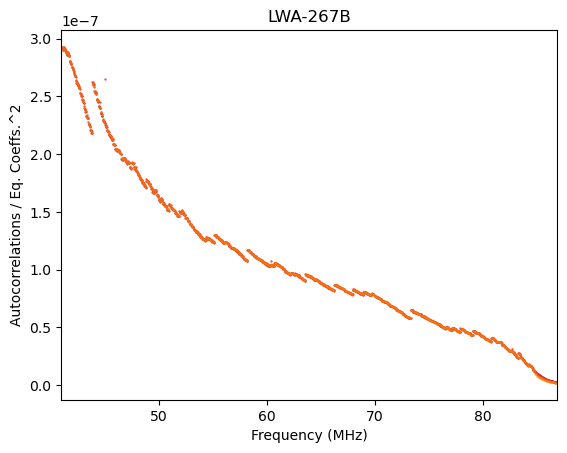

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


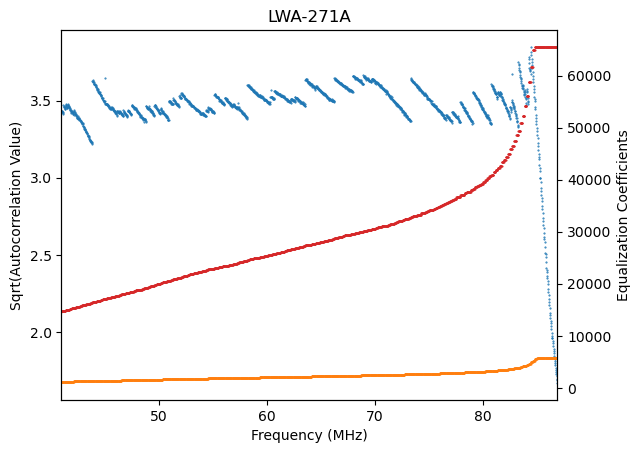

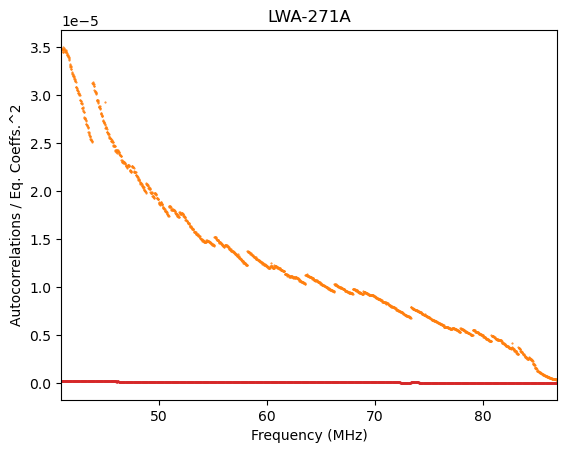

(0.00625450536269835+0j)


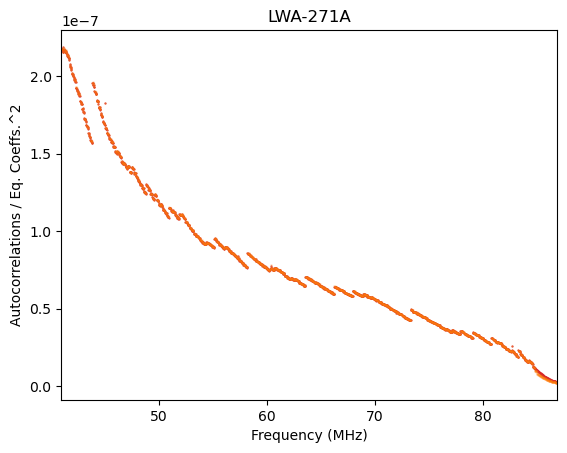

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


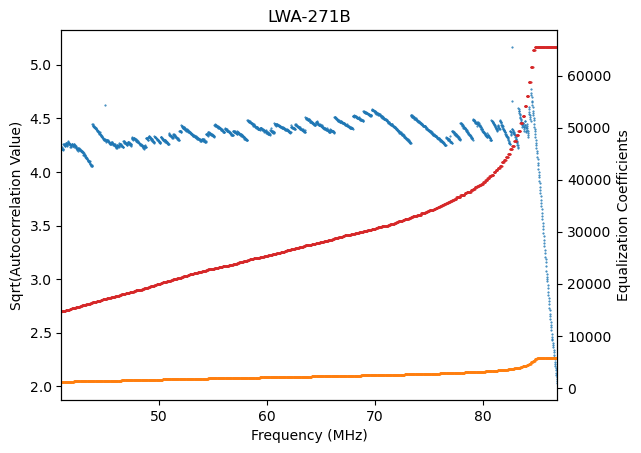

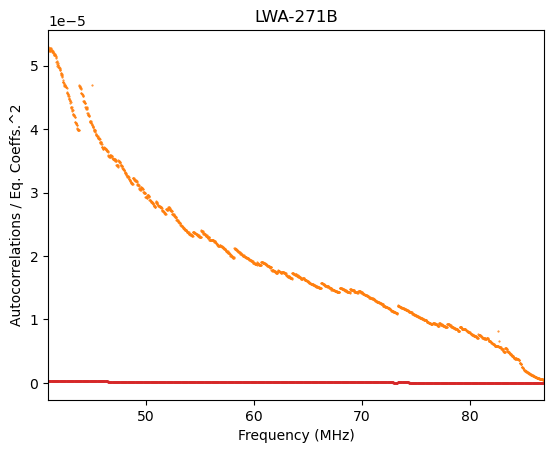

(0.006254592140206689+0j)


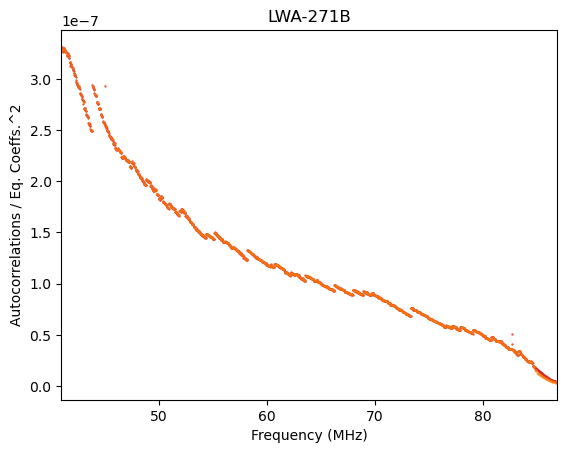

In [24]:
for ant_ind, ant in enumerate(dictionary["antnames"][0:10]):
    eq_coeffs = dictionary["coeffs_set"][dictionary["coeffs_set_inds"][ant_ind]]
    eq_coeffs = np.repeat(eq_coeffs, 8)  # One coefficient per 8 channels
    
    # Get equalization coefficients from original file
    ant_ind_2 = np.where(eq_coeffs_mat["antNames"] == ant)[0][0]
    for coeff_ind in range(7):
        if ant_ind_2 in eq_coeffs_mat[f"eq{coeff_ind}"]:
            break
    eq_coeffs_2 = eq_coeffs_mat["coef"][coeff_ind, :]
    eq_coeffs_2 = np.repeat(eq_coeffs_2, 8)  # One coefficient per 8 channels
    eq_freqs = np.arange(len(eq_coeffs)) * np.mean(uv.channel_width)

    # Truncate equalization coefficents to include only those saved in the data
    eq_coeffs = eq_coeffs[560:-464]
    eq_coeffs_2 = eq_coeffs_2[560:-464]
    eq_freqs = eq_freqs[560:-464]

    use_antname = f"{ant[0:3]}{ant[4:7]}"
    if ant[-1] == "A":
        use_pol = -5
    elif ant[-1] == "B":
        use_pol = -6
    autocorrs_single_ant = uv.select(antenna_names=use_antname, polarizations=use_pol, inplace=False)

    fig, ax1 = plt.subplots()
    ax1.set_title(ant)
    ax1.set_xlabel("Frequency (MHz)")
    ax1.plot(autocorrs_single_ant.freq_array/1e6, np.sqrt(autocorrs_single_ant.data_array[0, :, 0]), ".", markersize=1)
    ax1.set_ylabel("Sqrt(Autocorrelation Value)")
    #ax1.set_ylim([3.5,4.5])
    ax1.set_xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    #ax1.set_xlim([50, 51])

    ax2=ax1.twinx()
    ax2.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
    ax2.plot(eq_freqs/1e6, eq_coeffs_2, ".", markersize=1, color="tab:orange")
    ax2.set_ylabel("Equalization Coefficients")
    #ax2.set_ylim([17500,22500])
    plt.show()
    plt.close()

    lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array))[0][0]
    highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array))[0][0]
    eq_coeffs = eq_coeffs[lowest_eq_ind:highest_eq_ind+1]
    eq_coeffs_2 = eq_coeffs_2[lowest_eq_ind:highest_eq_ind+1]
    eq_freqs = eq_freqs[lowest_eq_ind:highest_eq_ind+1]

    autos_normalized = autocorrs_single_ant.data_array[0, :, 0] / (0.25 * (eq_coeffs)**2.0)
    autos_normalized_2 = autocorrs_single_ant.data_array[0, :, 0] / (0.25 * (eq_coeffs_2)**2.0)
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1, color="tab:red")
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized_2, ".", markersize=1, color="tab:orange")
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

    multiplicative_factor = np.mean(autos_normalized)/np.mean(autos_normalized_2)
    print(multiplicative_factor)
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1, color="tab:red")
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized_2*multiplicative_factor, ".", markersize=2, color="tab:orange", alpha=0.2)
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.title(ant)
    plt.show()
    plt.close()

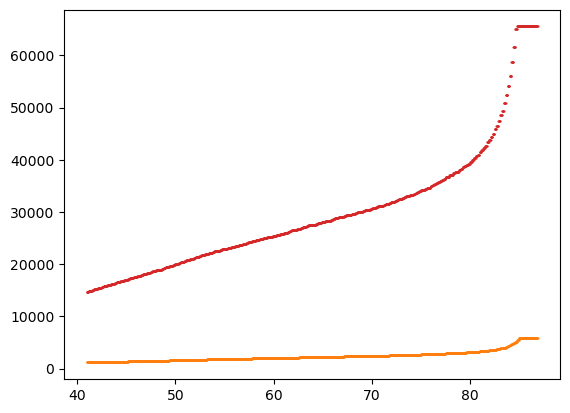

In [26]:
plt.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
plt.plot(eq_freqs/1e6, eq_coeffs_2, ".", markersize=1, color="tab:orange")
plt.show()
plt.close()

[0.07905749 0.07905749 0.07905749 ... 0.08873487 0.08873487 0.08873487]


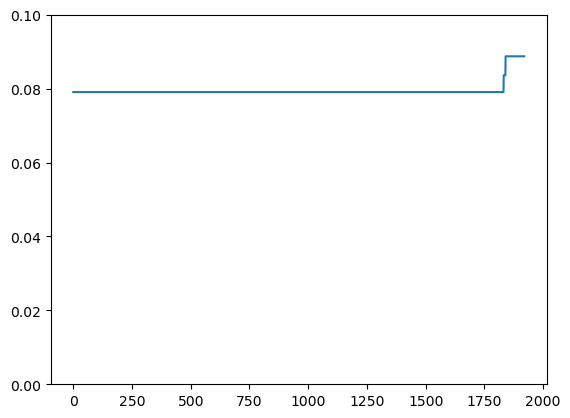

In [30]:
plt.plot(eq_coeffs_2/eq_coeffs)
plt.ylim(0,.1)
print(eq_coeffs_2/eq_coeffs)